<a href="https://colab.research.google.com/github/strawbaeri/CCINSYSL_EXAM_COM-DF211/blob/main/exam_1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Exam 💙 💛

Instructions ❗️❗️

❌ Do not remove or modify the notebook sections, subsections, exam questions or any text in this python notebook

✔️ Put your answer in the designated cells below each question

## Linear Regression

In [1091]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [1092]:
df = load_diabetes(as_frame=True, scaled=False)
df = df['frame']

In [1093]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [1094]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


1. Display the correlation of all features in the dataset using the `.corr()` function. `(5 points)`

In [1095]:
correlation = df.corr()
correlation

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


2. Using `sns.heatmap()`, draw a heatmap of the correlation of all features of the dataset. `(5 points)`

 - Set the `annot` parameter to **True**

<Axes: >

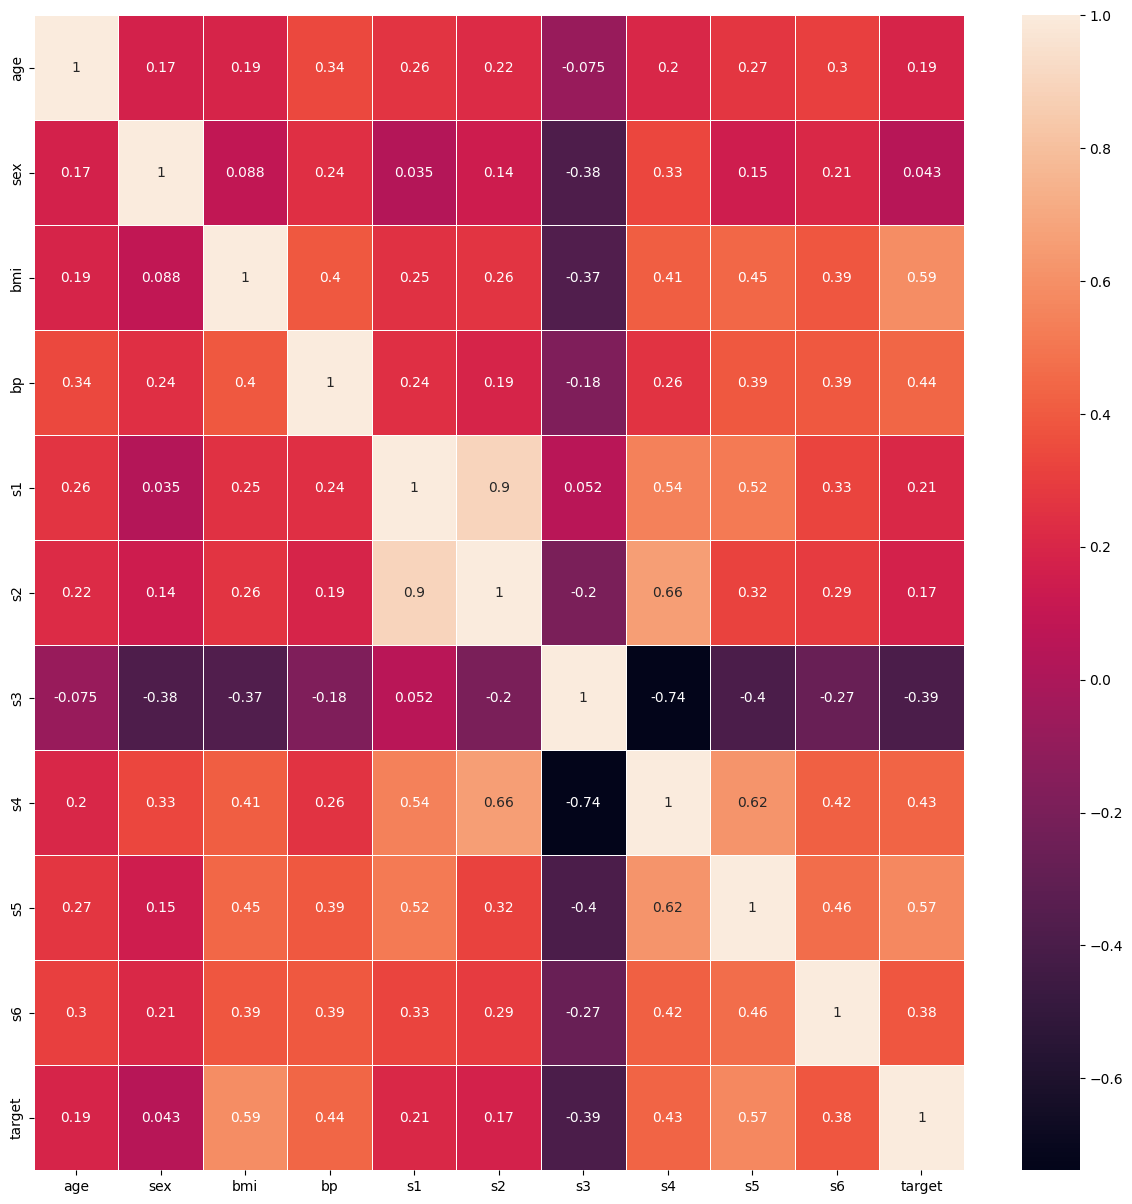

In [1096]:
plt.figure(figsize=(15, 15))

sns.heatmap(correlation, annot=True, linewidths=0.5)


3. Split the data set into a training and test set. `(5 points)`

In [1097]:
X = df[['bmi', 'bp','s4', 's5', 's6']]
y = df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=110)

4. Use the `the MinMaxScaler()` method to scale down the training and test set. `(5 points)`

In [1098]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

5. Create a new instance of the `LinearRegression` class. `(5 points)`

In [1099]:
model = LinearRegression()

6. Use the `fit()` method to train the linear regression model using the scaled training set. `(5 points)`

In [1100]:
model.fit(X_train_scaled, y_train)

LinearRegression()

7. Use the `predict()` method to make predictions using the scaled test set. `(5 points)`

In [1101]:
y_predi = model.predict(X_test_scaled)

8. Display the intercept, slope and $R^2$. `(5 points)`

In [1102]:
mse = mean_squared_error(y_test, y_predi)
r2 = r2_score(y_test, y_predi)

print(f'Mean Score: {mse}')
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
print(f'R2 Score: {r2}')


Mean Score: 2640.063988496879
Intercept: 2.769000724076477
Coefficients: [142.08388314  59.31232808  27.34046719 119.88319683  13.70358227]
R2 Score: 0.5554117273195138


9. Write a `normal_equation()` function that will return the intercept and coefficients/slopes. `(5 points)`

In [1103]:
def lg_normal_equation(X,y):

  ones = np.ones((X.shape[0], 1))
  X = np.append(ones, X, axis=1)
  result = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))
  return result, result[0], result[1:]

10. Call the `normal_equation()` function and pass the scaled training set. Display the intercept and slopes. `(5 points)`

In [1104]:
result, b, m = lg_normal_equation(X, y)

print("Result: ", result)
print("Intercept: ", b)
print("Slopes/Coefficients: ", m)

Result:  [-3.30694582e+02  6.30872193e+00  8.87901181e-01  2.51204901e+00
  4.52730109e+01  1.31908855e-01]
Intercept:  -330.6945824075301
Slopes/Coefficients:  [ 6.30872193  0.88790118  2.51204901 45.27301091  0.13190885]
